<a href="https://colab.research.google.com/github/tombro27/StudentScores/blob/main/Student_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [1]:
import requests
import io

import pandas as pd
import numpy as np

import seaborn as sns

## Loading Dataset

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

print (df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


## Some Data Insights

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the scores and study hours

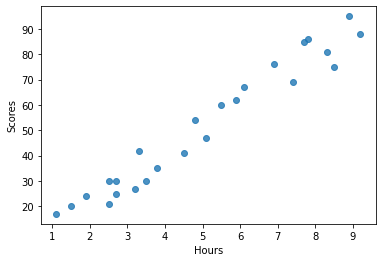

In [4]:
sns.regplot(x=df['Hours'],y=df['Scores'], fit_reg = False)

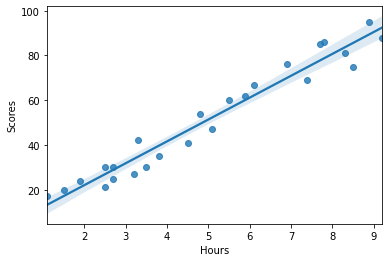

In [5]:
sns.regplot(x=df['Hours'],y=df['Scores'])

## Creating Regressor

In [6]:
X=df['Hours']
y=df['Scores']

In [7]:
X=X.values.reshape(-1,1)

1. Without using Scikit-Learn

In [8]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
W

array([2.48367341, 9.77580339])

In [10]:
X_new = np.array([[9.25]])
X_new_b = np.c_[np.ones((1,1)),X_new]
y_predict = X_new_b.dot(W)

In [11]:
print("For ",X_new[0][0], " hours of study predicted score is ",y_predict[0])

For  9.25  hours of study predicted score is  92.90985477015731


2. Using Scikit-Learn

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print("For ",X_new[0][0], " hours of study predicted score is ",lin_reg.predict([X_new[0]])[0])

For  9.25  hours of study predicted score is  92.9098547701573


So we get same results from both regressors. 
# For 9.25 hours of study we predicted score of 92.91